
# Project: Investigate a Dataset - [No_show_appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> No show appointment dataset collects information
from 100k medical appointments in Brazil.
This dataset contains the following cloumns:
1. PatientId
2. AppointmentID
3. Gender
4. ScheduledDay
5. AppointmentDay
6. Age
7. Neighbourhood
8. Scholarship
9. Hypertension
10. Diabetes
11. Alcoholism
12. Handicap
13. SMS_received
14. No-Show: 'No' means patients showed, 'Yes' not showed


### Question(s) for Analysis
>1. What is the reason pations schedule an appointment with a doctor and then not show up for it?

>2. What can hospitals do to reduse the proportion of paithions not showing up? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

Import all python packages that will be used in the analysis

<a id='wrangling'></a>
## Data Wrangling



In [6]:
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
df.shape

(110527, 14)

In [10]:
df.duplicated().sum()

0

There is no duplicated values 

In [11]:
df.isnull().sum().sum()

0

There is no null values 


### Data Cleaning
 

In [12]:
df = df.rename(columns={'Hipertension': 'Hypertension'})
df = df.rename(columns={'Handcap': 'Handicap'})
df = df.rename(columns={'No-show': 'appear'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
appear            110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There was errors in the name of some columns 

In [13]:
df['appear'] = df['appear'].replace(['No', 'Yes'], ['appear', 'not_appear'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,appear
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,appear
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,appear
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,appear
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,appear
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,appear


Because no-show column is confusing, this change was made.

In [14]:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay).dt.tz_localize(None)
df['ScheduledDay'] = pd.to_datetime(df.ScheduledDay).dt.tz_localize(None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
appear            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


To be able to do operations on dates, changing from object to datetime was made.

In [15]:
df['Age'] = df['Age'].replace(-1, 0)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Because there is no human that has age -1, this change was made.

In [16]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,appear
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,appear
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,appear
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,appear
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,appear
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,appear


Now the data is clean and EDA can be done in it.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (1. What is the reason patients schedule an appointment with a doctor and then not show up for it?)

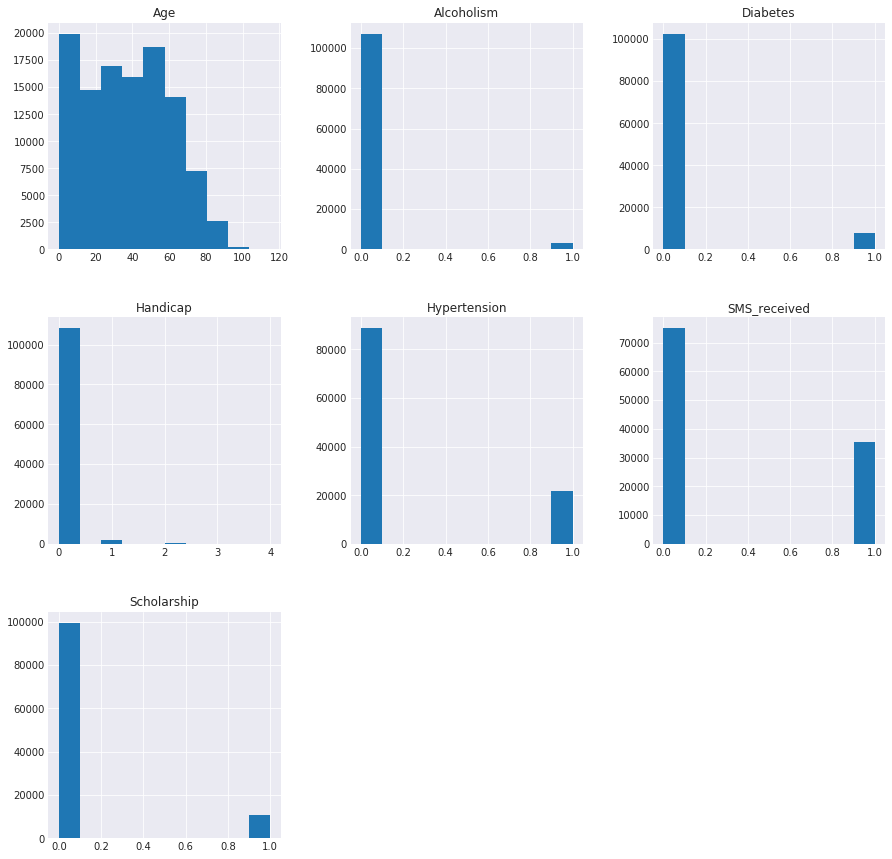

In [17]:
df.hist(figsize=(15,15));

In [18]:
appeared = df['appear'] == 'appear'
not_appeared = df['appear'] == 'not_appear'
appeared.mean(), not_appeared.mean()

(0.79806744053489198, 0.20193255946510807)

In [19]:
def graph_name(t, x, y):
    """ 
    this def is made to avoid writting these 3
    lines of code for all of the upcoming 
    visualizations. 
    """
    plt.title(t, fontsize=15)
    plt.xlabel(x, fontsize=15)
    plt.ylabel(y, fontsize=17);

Note: blue refers to patients coming, red refers to patients not coming

In [20]:
appear_count = df['appear'].value_counts()
appear_count

appear        88208
not_appear    22319
Name: appear, dtype: int64

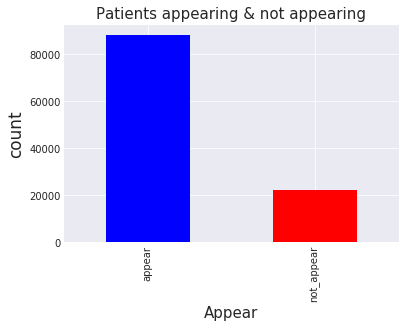

In [21]:
colors = ['blue', 'red']
appear_count.plot(kind='bar', color=colors)
graph_name('Patients appearing & not appearing', 'Appear', 'count')

In [22]:
not_appearing_percent = 22319/110527*100
not_appearing_percent

20.193255946510806

Patients who scheduled an appointment and didn't come are 20% of total patients.

In [23]:
gender_count = df['Gender'].value_counts()
gender_count

F    71840
M    38687
Name: Gender, dtype: int64

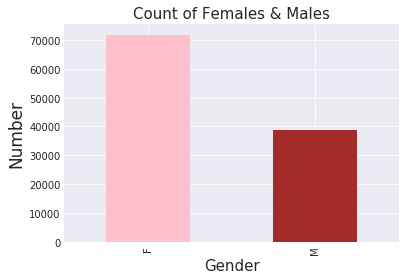

In [24]:
second_colors = ['pink', 'brown']
gender_count.plot(kind='bar', color=second_colors)
graph_name('Count of Females & Males', 'Gender', 'Number')

In [25]:
female_per = 71840/110527*100
male_per = 38687/110527*100
female_per, male_per

(64.99769287142509, 35.00230712857492)

Female percent is 65%, male percent is 35%.

In [27]:
gender_appear = df.groupby('Gender')['appear'].value_counts()
gender_appear

Gender  appear    
F       appear        57246
        not_appear    14594
M       appear        30962
        not_appear     7725
Name: appear, dtype: int64

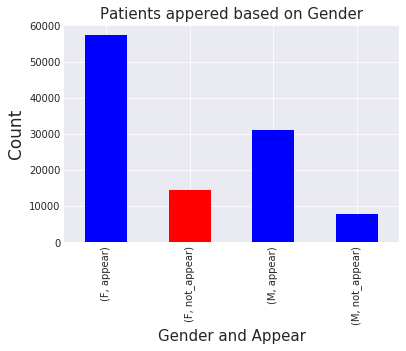

In [28]:
gender_appear.plot(kind='bar', color=colors)
graph_name('Patients appered based on Gender', 'Gender and Appear', 'Count')

In [29]:
female_not_appear = 14594/71840*100
male_not_appear = 7725/38687*100
female_not_appear, male_not_appear

(20.31458797327394, 19.967947889471915)

In [30]:
# This proprtion was calculated by miltyplying 20.3% 
# female not appering from all females, and 65% 
# females from all patients to reach the proprtion 
# of 13.19% from the 20% of all patients who don't 
# show up.
female_per = (20.3/100) * (65/100) * 100
male_per = (19.9/100) * (35/100) * 100
female_per, male_per

(13.195, 6.964999999999999)

Females are 13% of all pations who did not show up for their appointment.

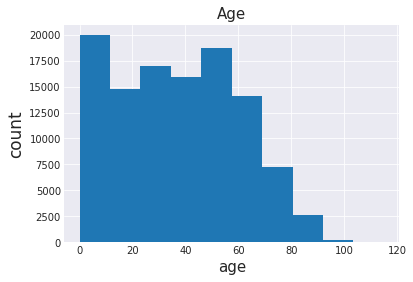

In [31]:
df['Age'].hist()
graph_name('Age', 'age', 'count')

In [32]:
df.Age[appeared].mean(), df.Age[not_appeared].mean()

(37.790075730092511, 34.317666562121957)

The mean age of patients who showed up is 37.7 years old.
The mean age of patients who did not show  up is 34.3 years old.

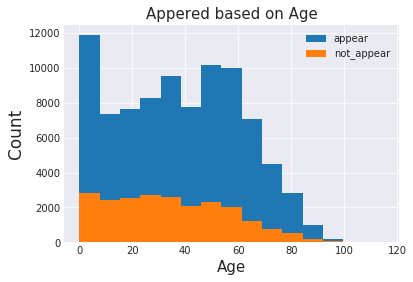

In [33]:
df.Age[appeared].hist(label='appear', bins=15)
df.Age[not_appeared].hist(label='not_appear', bins=15)
graph_name('Appered based on Age', 'Age', 'Count')
plt.legend();

From this visualization, most patients who didn't show up are between 15 to 35.

In [35]:
scho_values = df['Scholarship'].value_counts()
scho_values

0    99666
1    10861
Name: Scholarship, dtype: int64

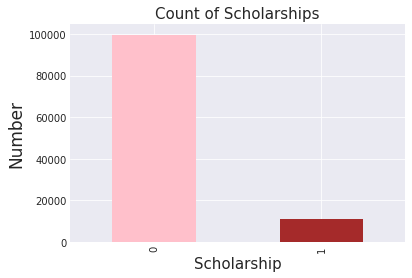

In [36]:
scho_values.plot(kind='bar', color=second_colors)
graph_name('Count of Scholarships', 'Scholarship', 'Number')

In [37]:
no_schol_per =  99666/110527 * 100
schol_per = 10861/110527 * 100
no_schol_per, schol_per

(90.17344178345562, 9.826558216544374)

Only 9.8% of all patients have a scholarship.

In [38]:
scoler_value = df.groupby('Scholarship')['appear'].value_counts()
scoler_value

Scholarship  appear    
0            appear        79925
             not_appear    19741
1            appear         8283
             not_appear     2578
Name: appear, dtype: int64

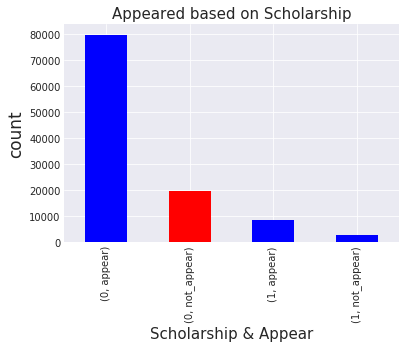

In [39]:
scoler_value.plot(kind='bar', color=colors)
graph_name('Appeared based on Scholarship', 'Scholarship & Appear', 'count')

In [40]:
no_schol_not_appear = 19741 / 99666 * 100
schol_not_appear = 2578 / 10861 * 100
no_schol_not_appear, schol_not_appear

(19.807155900708366, 23.73630420771568)

In [1]:
no_scholar_percent = (19.8/100) * (90.17/100) *100
scholar_percent = (23.7/100) * (9.8/100) *100
no_scholar_percent, scholar_percent

(17.85366, 2.3226)

patients who have a scholarship miss their appointment by only 2% while patients who don't have a scholarship miss their appointment by 18%. 
This means if the hospitals are willing to provide more scholarships, the proportion of patients who don't come will increase significantly.

In [42]:
hyper_valuse = df['Hypertension'].value_counts()
hyper_valuse

0    88726
1    21801
Name: Hypertension, dtype: int64

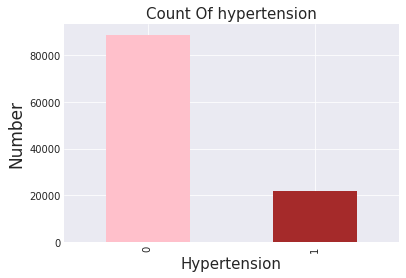

In [43]:
hyper_valuse.plot(kind='bar', color=second_colors)
graph_name('Count Of hypertension', 'Hypertension', 'Number')

In [44]:
no_hyper = 88726 / 110527 *100
hyper = 21801/110527 * 100
no_hyper, hyper

(80.27540781890397, 19.72459218109602)

19.7% of patients are hypertensive.

In [45]:
hyper_count = df.groupby('Hypertension')['appear'].value_counts()
hyper_count

Hypertension  appear    
0             appear        70179
              not_appear    18547
1             appear        18029
              not_appear     3772
Name: appear, dtype: int64

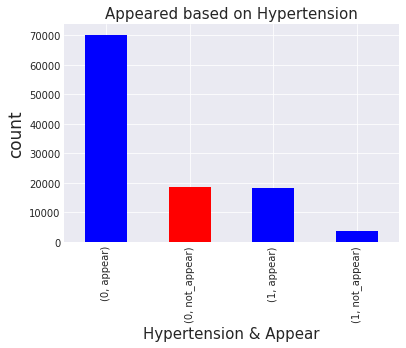

In [46]:
hyper_count.plot(kind='bar', color=colors)
graph_name('Appeared based on Hypertension', 'Hypertension & Appear', 'count')

In [47]:
no_hyper_not_appear = 18547/88726*100
hyper_not_appear = 3772/21801*100
no_hyper_not_appear, hyper_not_appear

(20.903680995424114, 17.301958625751112)

In [2]:
no_hyper_percent = (20.9/100) * (80.3/100) * 100
hyper_percent = (17.3/100) * (19.7/100) * 100
no_hyper_percent, hyper_percent

(16.7827, 3.4081)

Only 3% of patients who are hypertensive didn't show up.
This means that hypertension have little effect on patients showing up or not.

In [49]:
diab_valuse = df['Diabetes'].value_counts()
diab_valuse

0    102584
1      7943
Name: Diabetes, dtype: int64

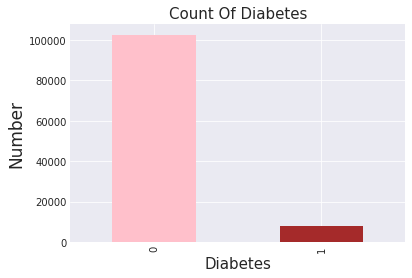

In [50]:
diab_valuse.plot(kind='bar', color=second_colors)
graph_name('Count Of Diabetes', 'Diabetes', 'Number')

In [51]:
no_diabetes = 102584 / 110527 * 100
diabetes = 7943 / 110527 * 100
no_diabetes, diabetes

(92.81352067820534, 7.186479321794674)

Only 7% of all patients have diabetes.

In [52]:
diabetes_count = df.groupby('Diabetes')['appear'].value_counts()
diabetes_count

Diabetes  appear    
0         appear        81695
          not_appear    20889
1         appear         6513
          not_appear     1430
Name: appear, dtype: int64

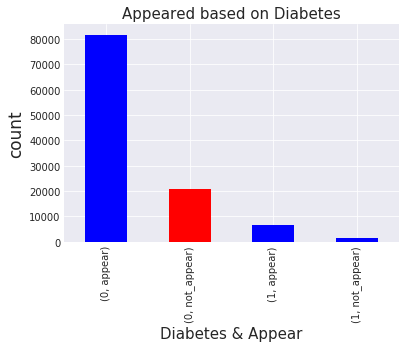

In [53]:
diabetes_count.plot(kind='bar', color=colors)
graph_name('Appeared based on Diabetes', 'Diabetes & Appear', 'count')

In [54]:
no_diabetes_not_appear = 20889 / 102584 * 100
diabetes_not_appear = 1430 / 7943 * 100
no_diabetes_not_appear, diabetes_not_appear

(20.362824612025268, 18.00327332242226)

In [3]:
no_diab_percent = (20.36/100) * (92.8/100) * 100
diab_percent = (18/100) * (7.19/100) * 100
no_diab_percent, diab_percent

(18.89408, 1.2942)

Only 1.2% of patients who have Diabetes didn't show up.
This means that Diabetes have little effect on pations showing up or not.

In [56]:
alcoh_valuse = df['Alcoholism'].value_counts()
alcoh_valuse

0    107167
1      3360
Name: Alcoholism, dtype: int64

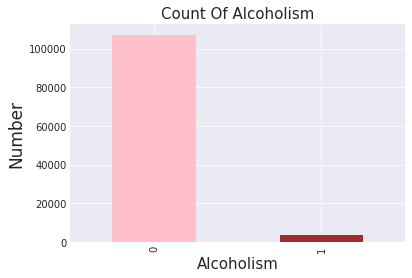

In [57]:
alcoh_valuse.plot(kind='bar', color=second_colors)
graph_name('Count Of Alcoholism', 'Alcoholism', 'Number')

In [58]:
no_alcohol = 107167 / 110527 * 100
alcohol = 3360 / 110527 * 100
no_alcohol, alcohol

(96.96001881893113, 3.039981181068879)

Only 3% of patients drink alcohol.

In [59]:
alcohl_count = df.groupby('Alcoholism')['appear'].value_counts()
alcohl_count

Alcoholism  appear    
0           appear        85525
            not_appear    21642
1           appear         2683
            not_appear      677
Name: appear, dtype: int64

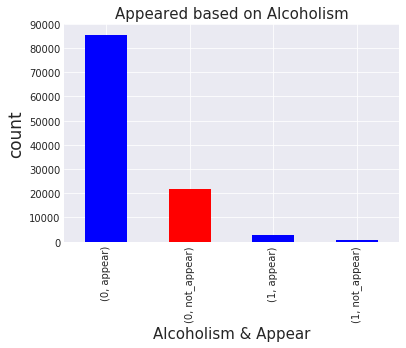

In [60]:
alcohl_count.plot(kind='bar', color=colors)
graph_name('Appeared based on Alcoholism', 'Alcoholism & Appear', 'count')

In [61]:
no_alcohol_not_appear = 21642 / 107167 * 100
alcohol_not_appear = 677 / 3360 * 100
no_alcohol_not_appear, alcohol_not_appear

(20.194649472318904, 20.148809523809526)

In [4]:
no_alcoh_percent = (20.19/100) * (96.96/100) * 100
alcoh_percent = (20.14/100) * (3.04/100) * 100
no_alcoh_percent, alcoh_percent

(19.576224, 0.612256)

Only 0.6% of patients who drink alcohol didn't show up.
This means that alcoholism have no effect on pations showing up or not.

In [64]:
hand_value = df['Handicap'].value_counts()
hand_value

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

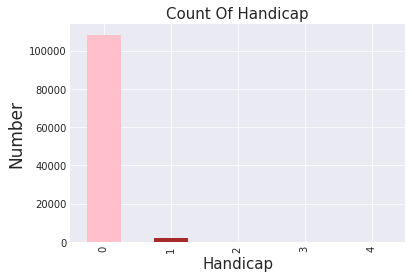

In [65]:
hand_value.plot(kind='bar', color=second_colors)
graph_name('Count Of Handicap', 'Handicap', 'Number')

In [66]:
no_handicap = 108286 / 110527 * 100
handicap = (2042+183+13+3) / 110527 * 100
no_handicap, handicap

(97.97244112298353, 2.0275588770164754)

Only 2% of patients are handicap.

In [67]:
handicap_count = df.groupby('Handicap')['appear'].value_counts()
handicap_count

Handicap  appear    
0         appear        86374
          not_appear    21912
1         appear         1676
          not_appear      366
2         appear          146
          not_appear       37
3         appear           10
          not_appear        3
4         appear            2
          not_appear        1
Name: appear, dtype: int64

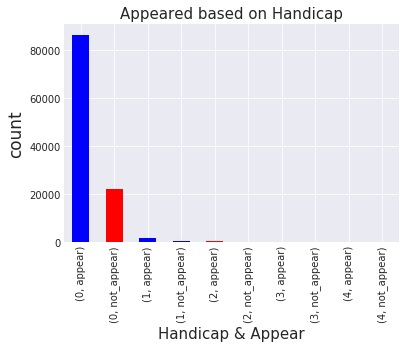

In [68]:
handicap_count.plot(kind='bar', color=colors)
graph_name('Appeared based on Handicap', 'Handicap & Appear', 'count')

In [69]:
no_handicap_not_appear = 21912/108286 * 100
handicap_not_appear = (366+37+3+1) / (2042+183+13+3) * 100
no_handicap_not_appear, handicap_not_appear

(20.235302809227417, 18.16153502900491)

In [5]:
no_handicap_percent = (20.25/100) * (97.97/100) * 100
handicap_percent = (18.16/100) * (2.03/100) * 100
no_handicap_percent, handicap_percent

(19.838925000000003, 0.368648)

Only 0.36% of patients who are handicap didn't show up.
This means that handicap have no effect on pations showing up or not.

In [72]:
sms_value = df['SMS_received'].value_counts()
sms_value

0    75045
1    35482
Name: SMS_received, dtype: int64

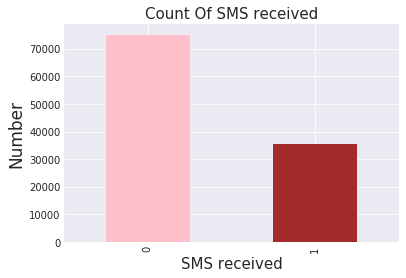

In [73]:
sms_value.plot(kind='bar', color=second_colors)
graph_name('Count Of SMS received', 'SMS received', 'Number')

In [74]:
no_sms = 75045 / 110527 * 100
sms = 35482 / 110527 * 100
no_sms, sms

(67.89743682539108, 32.10256317460892)

32% of patients received sms

In [75]:
sms_count = df.groupby('SMS_received')['appear'].value_counts()
sms_count

SMS_received  appear    
0             appear        62510
              not_appear    12535
1             appear        25698
              not_appear     9784
Name: appear, dtype: int64

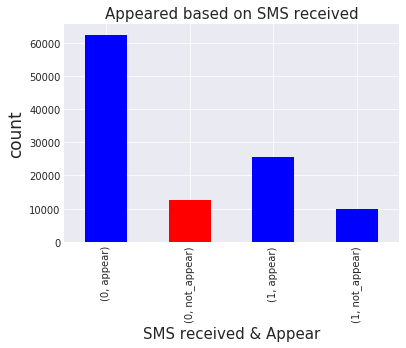

In [77]:
sms_count.plot(kind='bar', color=colors)
graph_name('Appeared based on SMS received', 'SMS received & Appear', 'count')

In [78]:
no_sms_not_appear = 12535 / 75045 * 100
sms_not_appear = 9784 / 35482 * 100
no_sms_not_appear, sms_not_appear

(16.703311346525417, 27.574544839637)

In [6]:
no_sms_percent = (16.7/100) * (67.89/100) * 100
sms_percent = (27.57/100) * (32.1/100) * 100
no_sms_percent, sms_percent

(11.33763, 8.84997)

Nearly 12% of patients who didn't receive sms didn't show up.
This means that patients who received sms are more likely to show up.

<a id='conclusions'></a>
## Conclusions

Patients who scheduled an appointment and didn't come are 20% of total patients.
>1. Offering more scholarships will decrease number of patients not showing up for their medical appointments by nearly 9 times.
This means if the hospitals are willing to provide more scholarships, the proportion of patients who don't come will increase significantly.
>2. Sending more sms will increase number of patients who show up. But we there is a limitation on information like why the hospital sends sms for some patients not all patients, what time these sms were sent, and can hospitals send sms for all patients, this can't be known for sure because this is might be a correlation not causation relationship.
>3. There is a limitation on Gender column, we need more information to invistigate because we don't know the reason why females miss their appointment more than males and there is no more information available about gender.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])